# Preprocessing 
## Raw data is passed to text preprocessing pipeline to remove:


*   punctuation marks
*   stop words
*   lemmatization


In [ ]:
pip install  gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
import string
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.model_selection import KFold
ps = nltk.stem.porter.PorterStemmer()
lem = nltk.stem.wordnet.WordNetLemmatizer()
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from sklearn import preprocessing
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import svm
import itertools
#from mlxtend.evaluate import bias_variance_decomp
import socket
import gensim
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.test.utils import common_texts
from gensim.test.utils import datapath
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec





In [ ]:

import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('gutenberg')

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
# list of books of the same geners (fiction book)
list_of_books=["austen-emma.txt",'milton-paradise.txt', 'bible-kjv.txt','chesterton-ball.txt','shakespeare-caesar.txt']

In [ ]:
# list of authors
list_of_authors=["Jane Austen","JOHN MILTON","King James Version"," G.K. Chesterton ","Maria Edgeworth"]

In [ ]:
#read the list of books from nltk.corpus.gutenberg.words
# the function takes the list of books and returns list of book words
def read_book(list_of_books):
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  book_words=[]
  for book in list_of_books:
    
    book_words.append(nltk.corpus.gutenberg.raw(book))
  return book_words

In [ ]:
books=read_book(list_of_books)
print(books[4][0:60])

[The Tragedie of Julius Caesar by William Shakespeare 1599]



In [ ]:
# first step in cleaning the raw text is to remove the punctuation marks
# This function takes list of book words and returns list of books words without punctuation marks
def cleaning(books):
  remove_pun=[]
  tokenizer = nltk.RegexpTokenizer(r"\w+[-']*\w*")
  for b in books:
    new_words = tokenizer.tokenize(b)
    remove_pun.append(new_words)
  return remove_pun 


In [ ]:
clean_book=cleaning(books)
print(len(clean_book[0]))

159458


Plot the first 20 highest words frequency before data cleansing

1.   List item
2.   List item

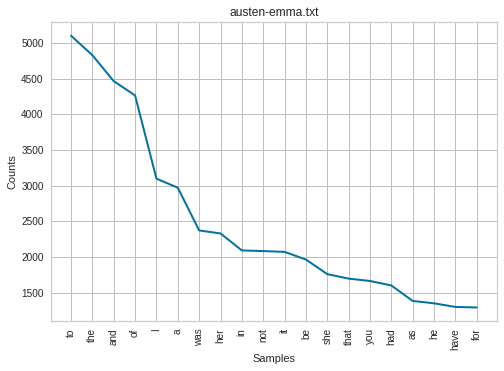

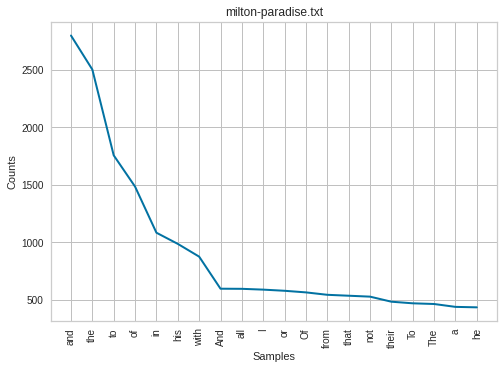

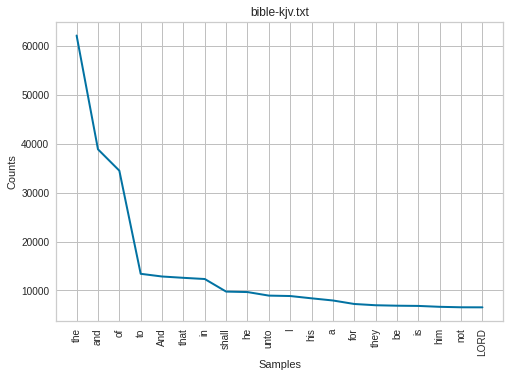

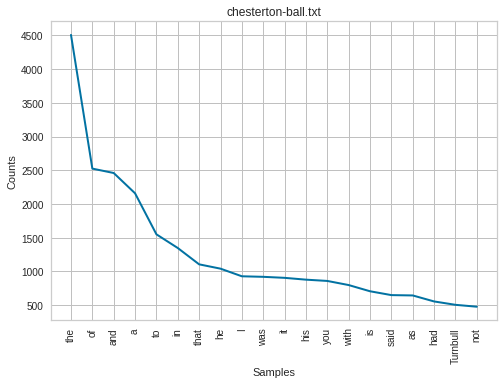

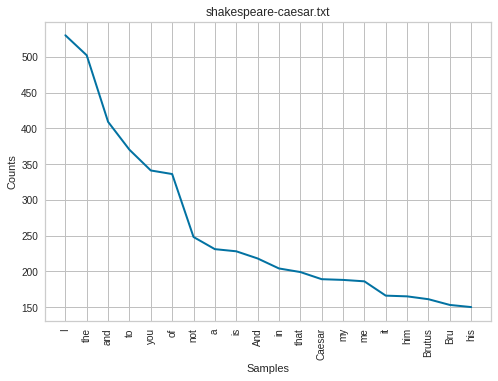

In [ ]:
#plot the hieghtest word frequency in each book before cleansing
for i in range(len(clean_book)):
  freq = nltk.FreqDist(clean_book[i])
  freq.plot(20, cumulative=False,title=list_of_books[i])

In [ ]:
#second step in cleaning raw text is to remove stop words
#remove_stopwords(clean_book):takes cleaned book without punctuation marks and returns cleaned book without stop words 
def remove_stopwords(clean_book):
  stop_words = set(stopwords.words('english')+['could','can','may','might','would','will','miss','mr','mrs','said','say','must','should'])
  removestopword=[]
  for i in clean_book:
    remove_stopword=[]
    for cb in i:
      if cb.lower() not in stop_words :
        remove_stopword.append(cb.lower())
    removestopword.append(remove_stopword)
  return removestopword

In [ ]:
removed_stopedword=remove_stopwords(clean_book)


In [ ]:
#join the tokenized words into one list  
def labeling_sentence(splitss):
  labels=[]
  for i in splitss:
    for j in i:
      labels.append(j)
  
  return labels

plot the hieghtest 20 words frequency in each book after cleansing

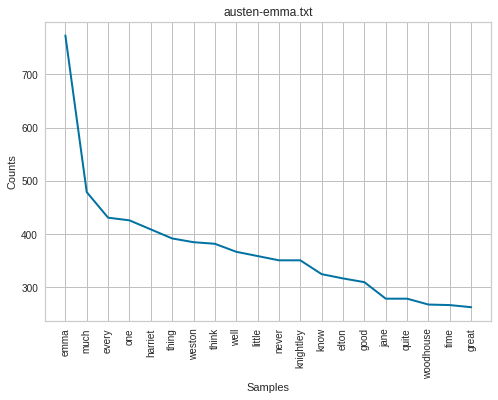

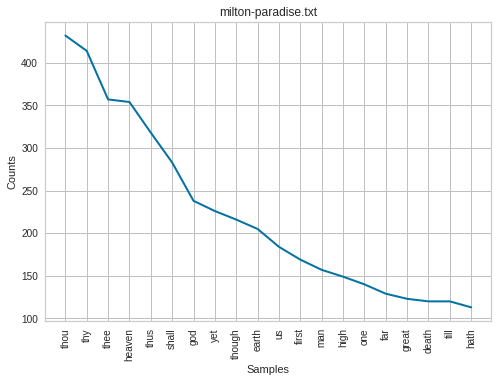

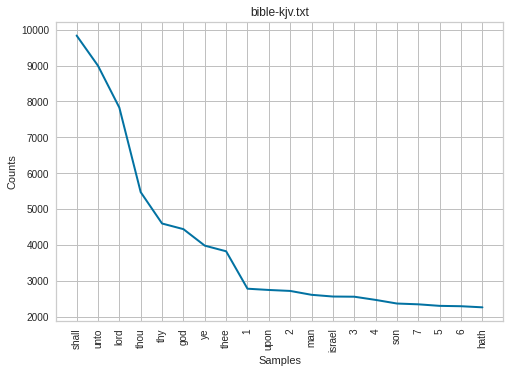

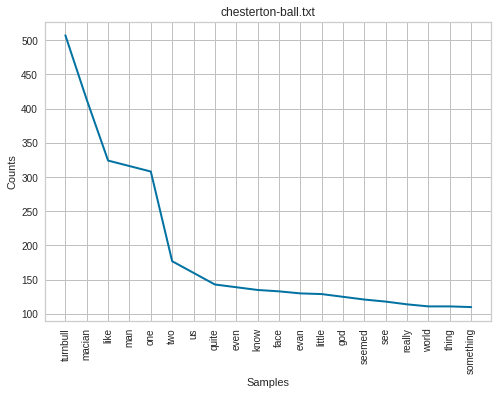

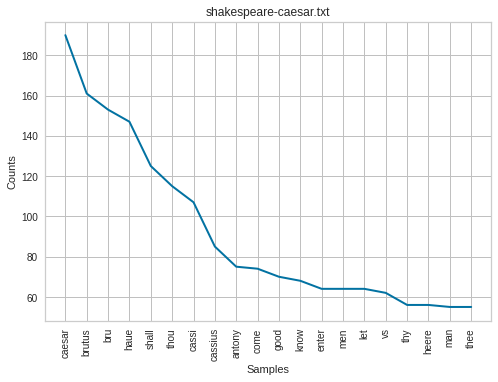

In [ ]:
  for i in range(len(removed_stopedword)):

    freq = nltk.FreqDist(removed_stopedword[i])
    freq.plot(20, cumulative=False,title=list_of_books[i])

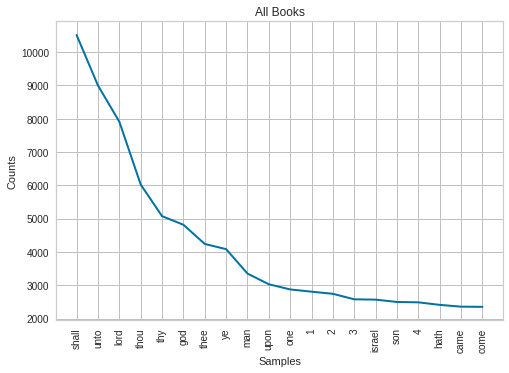

<AxesSubplot:title={'center':'All Books'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
#plot the hieghtest 20 words frequency in all 5 books after cleansing
freq = nltk.FreqDist(labeling_sentence(removed_stopedword))
freq.plot(20, cumulative=False,title='All Books')

In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


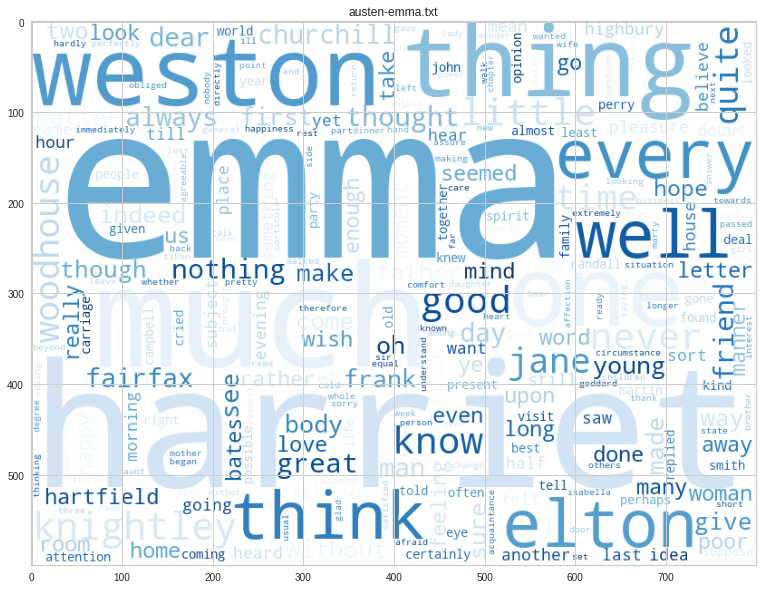

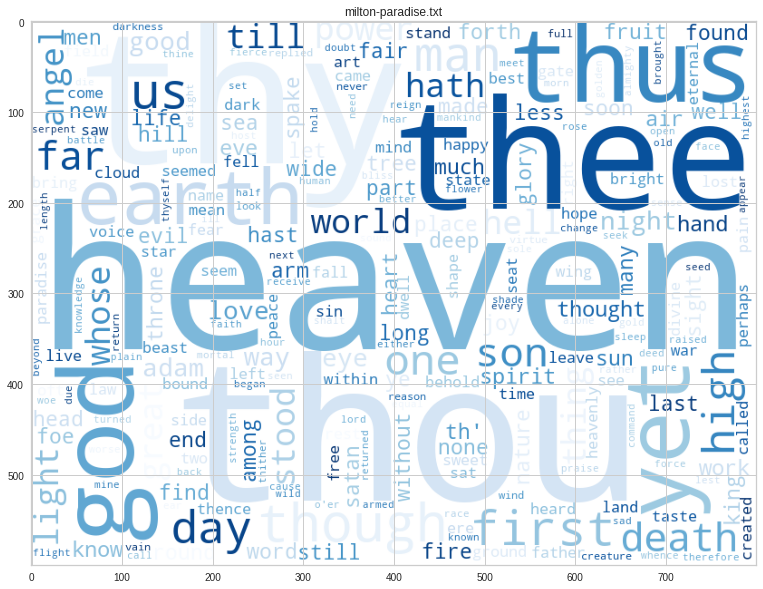

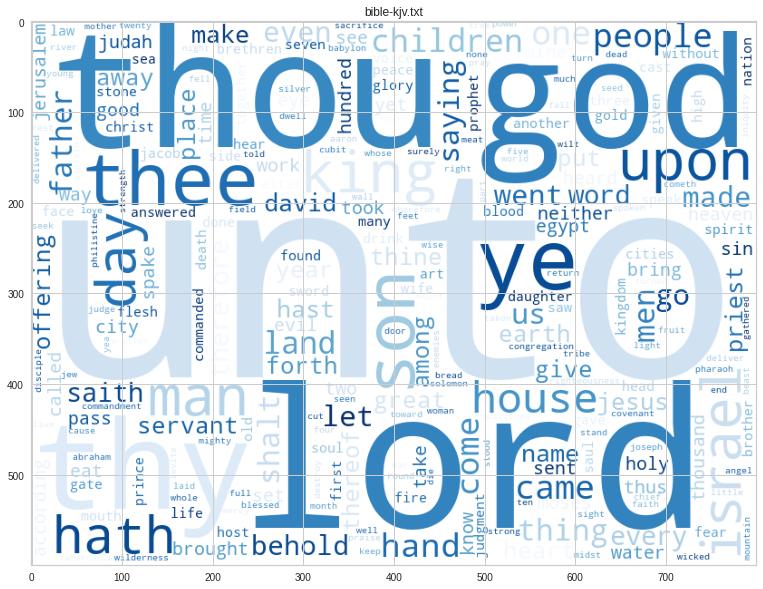

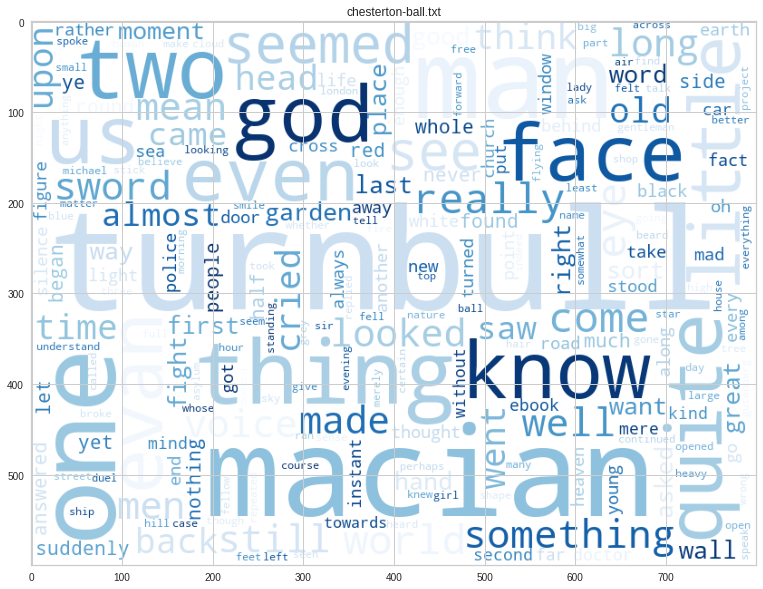

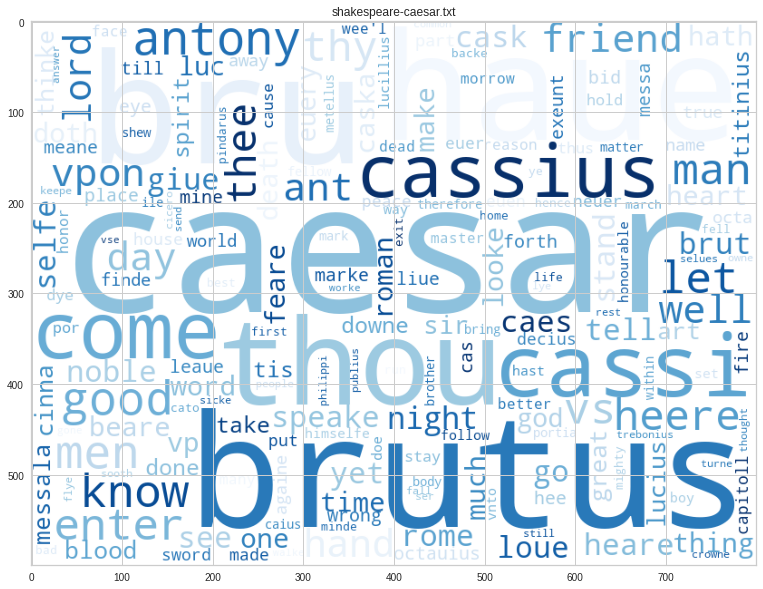

In [ ]:
from wordcloud import WordCloud
#generate word cloud for each book
for i in range(len(removed_stopedword)):
  wordcloud = WordCloud(background_color='white',width=800, height=600, \
                      min_font_size=10, max_words=500, collocations=False,  colormap="Blues")
  wordcloud.generate(" ".join(removed_stopedword[i]))

  plt.figure(figsize=(15, 10))
  plt.title(list_of_books[i])
  plt.imshow(wordcloud)
  plt.show()

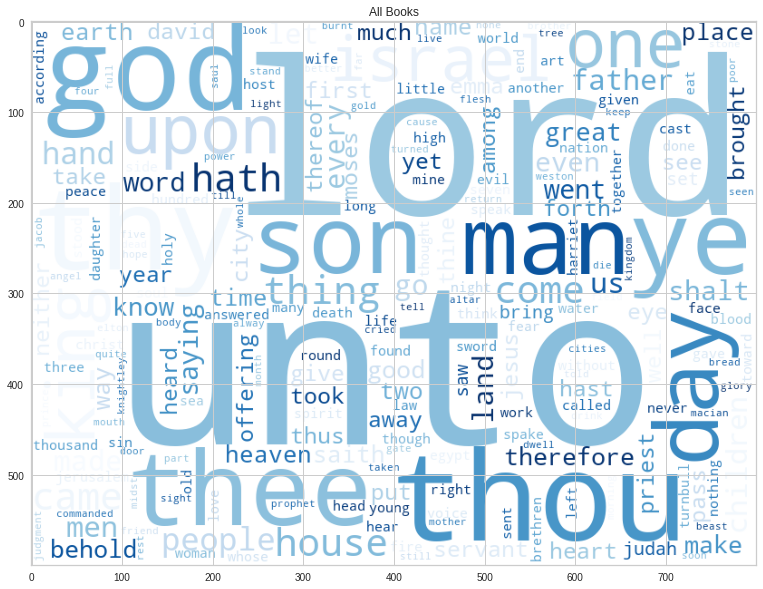

In [ ]:

#generate word cloud for all books
wordcloud = WordCloud(background_color='white',width=800, height=600, 
                      min_font_size=10, max_words=500, collocations=False,  colormap="Blues")
wordcloud.generate(" ".join(labeling_sentence(removed_stopedword)))

plt.figure(figsize=(15, 10))
plt.title("All Books")
plt.imshow(wordcloud)
plt.show()

In [ ]:
# get_wordnet_pos(word) returns the position of the word to be used in lemmatization 
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def Lemmatisation_Stemming(book_lst, flg_stemm=False, flg_lemm=True):
  ll=[]
  for b in book_lst:
    lst_text=[]
  ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
      for w in b:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text.append(ps.stem(w))
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
      lemmatizer = WordNetLemmatizer()
      
      for w in b:
        lst_text.append(lemmatizer.lemmatize(w, get_wordnet_pos(w)))
    ll.append(lst_text)
    # ll.append(' '.join(lst_text))
  
  return ll


In [ ]:
def generate_random_indeces(length):
  import random
  lst = []
  for i in range(200):
    tmp = random.randint(0,length-100)
    lst.append(tmp)
  return lst

In [ ]:
def joined_sentences(sentences):
  joined = []
  for i in sentences:
    book=[]
    for w in i:
      book.append(' '.join(w))
    joined.append(book)
  return joined

In [ ]:
def join_to_sen(sentences):
  book=[]
  for i in sentences:
    for b in i :
      book.append(' '.join(b)) 
  
  return book

In [ ]:
words_num = 150
def splitting_to_words(removed_stopedword):
  books = []
  for clean_book in removed_stopedword:
    sentences=[]
    indices = generate_random_indeces(len(clean_book))
    for i in indices:
      sentences.append(clean_book[i:i+words_num])
    books.append(sentences)
  return books

In [ ]:
#labels the list of books
def labeling(list_of_authors):
  labels=[]
  for i in list_of_authors:
    for j in range(200):
      labels.append(i)
  
  return label_encoders(labels)

In [ ]:
#label encoder for the predicted column
def label_encoders(authors):
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  le.fit(authors)
  labeles=le.transform(authors)

  

  return labeles

In [ ]:
def dispaly_Dataframe(wsplits,splitss,list_of_authors):
  
  df = pd.DataFrame()
  df['sentences'] = labeling_sentence(splitss)
  df['Words'] = labeling_sentence(wsplits)
  df['Authors_Names'] = labeling(list_of_authors)
  
  return df

In [ ]:
def function_collection(list_of_books):
  books=read_book(list_of_books)
  clean_book=cleaning(books)
  removed_stopedword=remove_stopwords(clean_book)
  lORs=Lemmatisation_Stemming(removed_stopedword)
  wsplits=splitting_to_words(lORs)
  join_words=joined_sentences(wsplits)
  return dispaly_Dataframe(wsplits,join_words,list_of_authors)

In [ ]:
books=read_book(list_of_books)
clean_book=cleaning(books)
# %store -r lORs
lORs=Lemmatisation_Stemming(clean_book)
removed_stopedword=remove_stopwords(lORs)

wsplits=splitting_to_words(removed_stopedword)
join_words=joined_sentences(wsplits)
ww=join_to_sen(wsplits)
data_frame=dispaly_Dataframe(wsplits,join_words,list_of_authors)

In [ ]:
len(data_frame['Words'][0])

150

In [ ]:
# %store lORs
# %store data_frame

Stored 'lORs' (list)
Stored 'data_frame' (DataFrame)


In [ ]:
data_frame

,sentences,Words,Authors_Names
0,enlighten jealousy frank churchill take countr...,"[enlighten, jealousy, frank, churchill, take, ...",2
1,find father quickly back weston met little per...,"[find, father, quickly, back, weston, met, lit...",2
2,eye emma complacently rude--but upon word wood...,"[eye, emma, complacently, rude--but, upon, wor...",2
3,daily visit donwell two eldest boy whose healt...,"[daily, visit, donwell, two, eldest, boy, whos...",2
4,friendly goodhumoured playfulness exactly suit...,"[friendly, goodhumoured, playfulness, exactly,...",2
...,...,...,...
995,bru talke stand publius good cheere harme inte...,"[bru, talke, stand, publius, good, cheere, har...",4
996,farewell cassius meete againe shall smile part...,"[farewell, cassius, meete, againe, shall, smil...",4
997,roome hoe tell antony brutus tane 1 sold ile t...,"[roome, hoe, tell, antony, brutus, tane, 1, so...",4
998,speak brutus groan vnderneath ages yoake haue ...,"[speak, brutus, groan, vnderneath, ages, yoake...",4


#  BOW Uni_Gram

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
count_vect = CountVectorizer(stop_words='english')
all_records = np.array(join_words).reshape((-1,1))
BOWs = count_vect.fit_transform(all_records.ravel()).toarray()
# print(len(BOWs[0]))
BOWs

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_frame['BOW'] = list(BOWs)
data_frame

,sentences,Words,Authors_Names,BOW
0,enlighten jealousy frank churchill take countr...,"[enlighten, jealousy, frank, churchill, take, ...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,find father quickly back weston met little per...,"[find, father, quickly, back, weston, met, lit...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,eye emma complacently rude--but upon word wood...,"[eye, emma, complacently, rude--but, upon, wor...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,daily visit donwell two eldest boy whose healt...,"[daily, visit, donwell, two, eldest, boy, whos...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,friendly goodhumoured playfulness exactly suit...,"[friendly, goodhumoured, playfulness, exactly,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
995,bru talke stand publius good cheere harme inte...,"[bru, talke, stand, publius, good, cheere, har...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
996,farewell cassius meete againe shall smile part...,"[farewell, cassius, meete, againe, shall, smil...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
997,roome hoe tell antony brutus tane 1 sold ile t...,"[roome, hoe, tell, antony, brutus, tane, 1, so...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
998,speak brutus groan vnderneath ages yoake haue ...,"[speak, brutus, groan, vnderneath, ages, yoake...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(BOWs)
#TfidfVectorizer(stop_words='english', max_features=200)
X_train_tf = tf_transformer.transform(BOWs).toarray()

X_train_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
data_frame['TF-IDF'] = list(X_train_tf)

In [ ]:
data_frame

,sentences,Words,Authors_Names,BOW,TF-IDF
0,enlighten jealousy frank churchill take countr...,"[enlighten, jealousy, frank, churchill, take, ...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,find father quickly back weston met little per...,"[find, father, quickly, back, weston, met, lit...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,eye emma complacently rude--but upon word wood...,"[eye, emma, complacently, rude--but, upon, wor...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,daily visit donwell two eldest boy whose healt...,"[daily, visit, donwell, two, eldest, boy, whos...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,friendly goodhumoured playfulness exactly suit...,"[friendly, goodhumoured, playfulness, exactly,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...
995,bru talke stand publius good cheere harme inte...,"[bru, talke, stand, publius, good, cheere, har...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
996,farewell cassius meete againe shall smile part...,"[farewell, cassius, meete, againe, shall, smil...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
997,roome hoe tell antony brutus tane 1 sold ile t...,"[roome, hoe, tell, antony, brutus, tane, 1, so...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
998,speak brutus groan vnderneath ages yoake haue ...,"[speak, brutus, groan, vnderneath, ages, yoake...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."




# LDA transformation


In [ ]:

# pip install -U "tmtoolkit[recommended,gensim]" --user

In [ ]:
!pip install -U tmtoolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.1 MB 4.9 MB/s 
     |████████████████████████████████| 25.9 MB 50.6 MB/s 
     |████████████████████████████████| 96 kB 3.1 MB/s 
     |████████████████████████████████| 10.4 MB 43.0 MB/s 
     |████████████████████████████████| 9.5 MB 43.6 MB/s 
     |████████████████████████████████| 11.5 MB 9.5 MB/s 
     |████████████████████████████████| 184 kB 44.0 MB/s 
     |████████████████████████████████| 1.0 MB 28.0 MB/s 
  Created wheel for globre: filename=globre-0.1.5-py3-none-any.whl size=19546 sha256=91b11c33f0b36e1fc73840eed16b0ede023dae5644089ad537c3d3cfa1ac9900
  Stored in directory: /root/.cache/pip/wheels/40/95/37/5303ce04fce53b6e64ed74a3f0a0e9ea11c348cac0c5c42a76
Successfully built globre
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.3
    Uninstalling srsly-2.4.3:
      Successfully uninstalled srsly-2.4.3
  Attem

In [ ]:
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import math
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(data_frame['sentences'])

In [ ]:

number_topics = range(2,16)
coherence_measures =[]
for i in number_topics:
    LDA = LatentDirichletAllocation(n_components=i ,random_state=42)
    LDA_out=LDA.fit_transform(dtm)
    coherence  = metric_coherence_gensim(measure='c_v', 
                            top_n=20,
                            topic_word_distrib=LDA.components_, 
                            dtm=dtm, 
                            vocab=np.array([x for x in cv.vocabulary_.keys()]), 
                            texts= data_frame['Words'].values)
#     print(coherence)
    # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
    avg_topic_coherence = sum([c for c in coherence if math.isnan(c)==False])/i
    coherence_measures.append(avg_topic_coherence)
    print(f'Average coherence for {i} topics: %.4f.' % avg_topic_coherence)

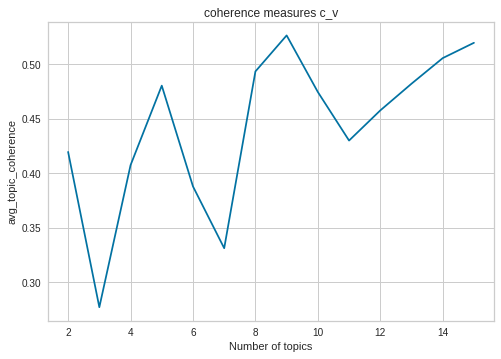

In [ ]:
plt.plot(number_topics, coherence_measures,label="c_v")
plt.title('coherence measures c_v')
plt.xlabel('Number of topics')
plt.ylabel('avg_topic_coherence')
plt.show()

In [ ]:
# i=11
# LDA = LatentDirichletAllocation(n_components=i ,random_state=42)
# LDA_out=LDA.fit_transform(dtm)
# coherence  = metric_coherence_gensim(measure='c_v', 
#                         top_n=20,
#                         topic_word_distrib=LDA.components_, 
#                         dtm=dtm, 
#                         vocab=np.array([x for x in cv.vocabulary_.keys()]), 
#                         texts= data_frame['Words'].values)
# #     print(coherence)
# # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
# avg_topic_coherence = sum([c for c in coherence if math.isnan(c)==False])/i
# # coherence_measures.append(avg_topic_coherence)
# print(f'Average coherence for {i} topics: %.4f.' % avg_topic_coherence)

Average coherence for 11 topics: 0.7753.


In [ ]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
# from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(data_frame['sentences'])


In [ ]:


number_topics = range(2,8)
coherence_measures =[]
for i in number_topics:
    LDA = LatentDirichletAllocation(n_components=i ,random_state=42)
    LDA_out=LDA.fit_transform(dtm)
    my_topics=[]
    for index,topic in enumerate(LDA.components_):
        ls=[cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]]
        my_topics.append(ls)
    dictionary = Dictionary(data_frame['Words'])
    corpus = [dictionary.doc2bow(text) for text in my_topics]
    cm = CoherenceModel(topics=my_topics, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    coherence = cm.get_coherence()  # get coherence value
    coherence_measures.append(coherence)
    print(f'coherence for {i} topics: %.4f.' % coherence)

coherence for 2 topics: -0.1188.
coherence for 3 topics: -0.2204.
coherence for 4 topics: -0.2145.
coherence for 5 topics: -0.3909.
coherence for 6 topics: -0.4011.
coherence for 7 topics: -0.3660.


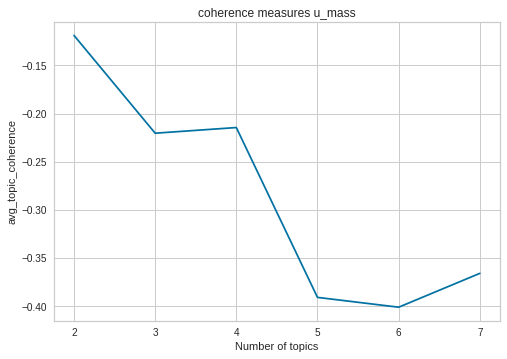

In [ ]:
plt.plot(number_topics, coherence_measures,label= "u_mass")
plt.title('coherence measures u_mass')
plt.xlabel('Number of topics')
plt.ylabel('avg_topic_coherence')
plt.show()

In [ ]:
best_n_topics = 5
LDA = LatentDirichletAllocation(n_components=best_n_topics ,random_state=42)
LDA_out=LDA.fit_transform(dtm)
my_topics=[]
for index,topic in enumerate(LDA.components_):
    ls=[cv.get_feature_names_out()[i] for i in topic.argsort()[-15:]]
    my_topics.append(ls)
dictionary = Dictionary(data_frame['Words'])
corpus = [dictionary.doc2bow(text) for text in my_topics]
cm = CoherenceModel(topics=my_topics, corpus=corpus, dictionary=dictionary, coherence='u_mass')
coherence = cm.get_coherence()  # get coherence value
print(f'coherence for {best_n_topics} topics: %.4f.' % coherence)

coherence for 5 topics: -0.4231.


In [ ]:
data_frame["LDA"] = list(LDA_out)


In [ ]:
data_frame['LDA'][0]

array([0.50637105, 0.00164854, 0.00163489, 0.00164389, 0.48870163])

# Doc2Vec

In [ ]:
# make word2vec and apply in document 
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

docs = [d for d in data_frame['sentences']]
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(docs)]

vec_size = 50
alpha = 0.025
d2v_model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.0025,
                min_count=1,
                dm =1)
d2v_model.build_vocab(documents)
d2v_model.train(documents, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)
d2v=d2v_model.docvecs.doctag_syn0
print(d2v.shape)
data_frame['Doc2Vec']= list(d2v)

(1000, 50)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).


In [ ]:
data_frame

,sentences,Words,Authors_Names,BOW,TF-IDF,LDA,Doc2Vec
0,enlighten jealousy frank churchill take countr...,"[enlighten, jealousy, frank, churchill, take, ...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.5063710513049003, 0.0016485379698266023, 0....","[0.07844931, -0.061190058, -0.07971094, 0.0288..."
1,find father quickly back weston met little per...,"[find, father, quickly, back, weston, met, lit...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2709527401548891, 0.001524558596444558, 0.0...","[0.05698806, -0.020943103, -0.06181723, -0.022..."
2,eye emma complacently rude--but upon word wood...,"[eye, emma, complacently, rude--but, upon, wor...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7376192230223516, 0.16172775981739573, 0.00...","[0.058220718, 0.018677283, -0.15338857, 0.0130..."
3,daily visit donwell two eldest boy whose healt...,"[daily, visit, donwell, two, eldest, boy, whos...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0015908187332120559, 0.0015621025127627946,...","[0.04879022, 0.019533858, -0.20195024, -0.0085..."
4,friendly goodhumoured playfulness exactly suit...,"[friendly, goodhumoured, playfulness, exactly,...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9929655062745467, 0.0017578138684346514, 0....","[0.01715503, 0.104354516, -0.14041838, -0.0133..."
...,...,...,...,...,...,...,...
995,bru talke stand publius good cheere harme inte...,"[bru, talke, stand, publius, good, cheere, har...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0015221951416811601, 0.001521007555216097, ...","[0.060271345, -0.13241321, 0.0137014035, 0.036..."
996,farewell cassius meete againe shall smile part...,"[farewell, cassius, meete, againe, shall, smil...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.001440123766105535, 0.0014409649056068307, ...","[0.046919122, -0.08775865, -0.044163518, 0.013..."
997,roome hoe tell antony brutus tane 1 sold ile t...,"[roome, hoe, tell, antony, brutus, tane, 1, so...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0014131195978076985, 0.0014077574642485209,...","[0.044014383, -0.08252081, -0.049179442, 0.024..."
998,speak brutus groan vnderneath ages yoake haue ...,"[speak, brutus, groan, vnderneath, ages, yoake...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0015029643345076452, 0.1883181457219799, 0....","[0.06371827, -0.1239734, -0.059208624, 0.05653..."


# Helpfull Functions


In [ ]:

%store data_frame
df = data_frame.sample(frac = 1,random_state = 0)
%store df
df

Stored 'data_frame' (DataFrame)
Stored 'df' (DataFrame)


,sentences,Words,Authors_Names,BOW,TF-IDF,LDA,Doc2Vec
993,dagger see rent enuious caska make wel-beloued...,"[dagger, see, rent, enuious, caska, make, wel-...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0014296822214148997, 0.03999926604747327, 0...","[0.1200521, -0.22371098, 0.024863295, 0.121600..."
859,thou seest world volumnius go enemies haue bea...,"[thou, seest, world, volumnius, go, enemies, h...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0014912959311917644, 0.0014951767044315343,...","[0.10022717, -0.12516703, -0.05351773, 0.06390..."
298,spouse much place admire person one long popul...,"[spouse, much, place, admire, person, one, lon...",1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.07616197924296038, 0.05594548326270131, 0.0...","[0.055651333, -0.055358253, -0.08583433, 0.001..."
553,three day ascend caesarea jerusalem 25 2 high ...,"[three, day, ascend, caesarea, jerusalem, 25, ...",3,"[0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.04278757921638664, 0.0, 0.0, 0.0,...","[0.0016284492634792418, 0.2503066123819208, 0....","[0.07980252, -0.14444615, -0.041994803, -0.023..."
672,pause sort thing built stuarts sour grin ask c...,"[pause, sort, thing, built, stuarts, sour, gri...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.001479725374088179, 0.1482311026085266, 0.0...","[0.10024683, -0.061785553, -0.049334724, 0.053..."
...,...,...,...,...,...,...,...
835,finde time cassius shall finde time come there...,"[finde, time, cassius, shall, finde, time, com...",4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0014489267964307917, 0.0014490298479831493,...","[0.06053461, -0.11977168, 0.03162271, 0.114796..."
192,quite shock mean fling slave-trade assure suck...,"[quite, shock, mean, fling, slave-trade, assur...",2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9936089483316393, 0.0015989797192949185, 0....","[0.04971948, -0.044547305, -0.083351135, 0.040..."
629,healthy happy old gentleman swung bar sicken e...,"[healthy, happy, old, gentleman, swung, bar, s...",0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0015958294169956453, 0.48344130819634135, 0...","[0.062929116, -0.101681754, -0.0660437, -0.011..."
559,12 therefore thou son man unto child thy peopl...,"[12, therefore, thou, son, man, unto, child, t...",3,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.042...","[0.0014659413543090447, 0.001461792228181985, ...","[0.07083162, -0.07874185, -0.0841543, 0.006050..."


In [ ]:
# pip install --upgrade numpy==1.19.5

  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\river\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.metrics import silhouette_samples, silhouette_score
# from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics import cohen_kappa_score
from numpy.core.fromnumeric import size
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics.cluster import v_measure_score


In [ ]:
def PCA_function(data,n_components=2):
  pca = PCA(n_components=n_components)
  PCA_reduction = pca.fit_transform(data)
  return PCA_reduction


In [ ]:
def my_scater_plot(X,title ,centers =None, labels =None):
  fig, ax = plt.subplots(figsize=(9,5))
  x_axis = [o[0] for o in X]
  y_axis = [o[1] for o in X]
  ax.scatter(x_axis, y_axis, c=labels,cmap='viridis')
  ax.set_title(title)
  # ax[1].set(xlabel='Number of clusters')
  # centers = kmeans.cluster_centers_
  if  centers is not None:
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.7)
    plt.show()

In [ ]:
# %store -r df
# df = data_frame.sample(frac = 1,random_state = 0)
# %store df
models_evaluation_dictionary ={}

# KMean

In [ ]:
#K_Means function to cluster the data
def Kmeans_model(bw,n_components = 7):
  wcss = []
  silhouette = []
  max_silhouette =-np.Infinity
  best_k = 0
  K =range(2, n_components)
  for i in K:
        kmeans = KMeans(n_clusters=i, init='k-means++' ,random_state=0)
        kmeans.fit(bw)
        wcss.append(kmeans.inertia_)
        cluster_labels =kmeans.predict(bw)
        s_score = silhouette_score(bw, cluster_labels)
        silhouette.append(s_score)
        if max_silhouette < s_score:
          max_silhouette = s_score 
          best_k = i
  #plot K_Means Clusters and ELbow method
  fig, ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].plot(K, wcss)
  ax[0].set_title('Elbow Method')
  ax[0].set(xlabel='K', ylabel='WCSS')
  
  
  kmeans = KMeans(n_clusters = best_k ,init = 'k-means++', random_state = 0)
  predicted_labels = kmeans.fit_predict(bw)

  plt.plot(K, silhouette, label='silhouette')
  plt.title('silhouette evaluation')
  plt.xlabel('Number of clusters')
  plt.ylabel('silhouette score')
  plt.show()
  true_authers=df['Authors_Names']
  print("Kmeans")

  conf_m = confusion_matrix(true_authers, predicted_labels)
  conf_argmax = conf_m.argmax(axis=0)
  pred = np.array([conf_argmax[i] for i in predicted_labels])

  cohen_kappa_scores =cohen_kappa_score(pred,true_authers)
  homogeneity=  homogeneity_score(true_authers, pred)
  completeness=  completeness_score(true_authers, pred)
  VM=v_measure_score(pred, true_authers)
  
  

  print(f'Best K value = {best_k}, with silhouette_score = {max_silhouette}')
  print("the cohen_kappa_score = ",cohen_kappa_scores)
  print("the homogeneity_score = ",homogeneity)
  print("the completeness_score = ",completeness)
  print("the v_measure_score = ",VM)
  return best_k, max_silhouette,cohen_kappa_scores,homogeneity,completeness,VM

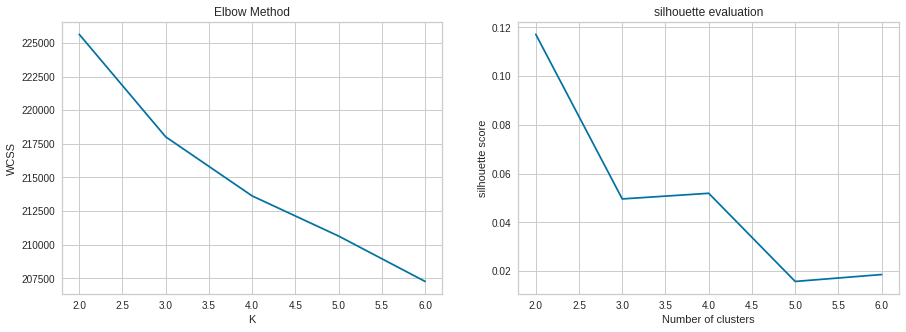

Kmeans
Best K value = 2, with silhouette_score = 0.11712436637134524
the cohen_kappa_score =  0.20999999999999996
the homogeneity_score =  0.18488224529471656
the completeness_score =  0.5804522430497108
the v_measure_score =  0.2804402927497223


In [ ]:
models_evaluation_dictionary["Kmeans_BOW"] = Kmeans_model(list(df['BOW']))

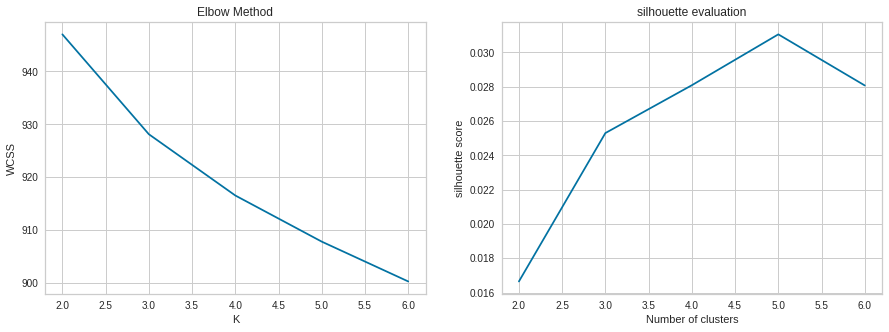

Kmeans
Best K value = 5, with silhouette_score = 0.03104831868613911
the cohen_kappa_score =  0.98875
the homogeneity_score =  0.9733832592492629
the completeness_score =  0.9735726315132478
the v_measure_score =  0.9734779361715309


In [ ]:
models_evaluation_dictionary["Kmeans_TF-IDF"] = Kmeans_model(list(df['TF-IDF']))

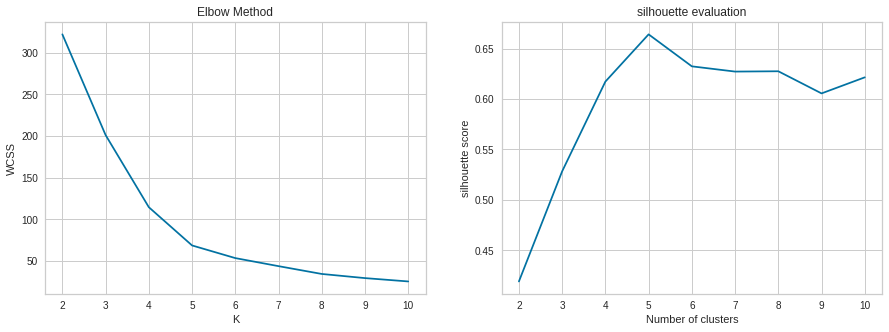

Kmeans
Best K value = 5, with silhouette_score = 0.6640193862392472
the cohen_kappa_score =  0.68875
the homogeneity_score =  0.6472895043583718
the completeness_score =  0.7690881148420735
the v_measure_score =  0.7029518935000746


In [ ]:
models_evaluation_dictionary["Kmeans_LDA"] = Kmeans_model(list(df['LDA']),n_components=11)

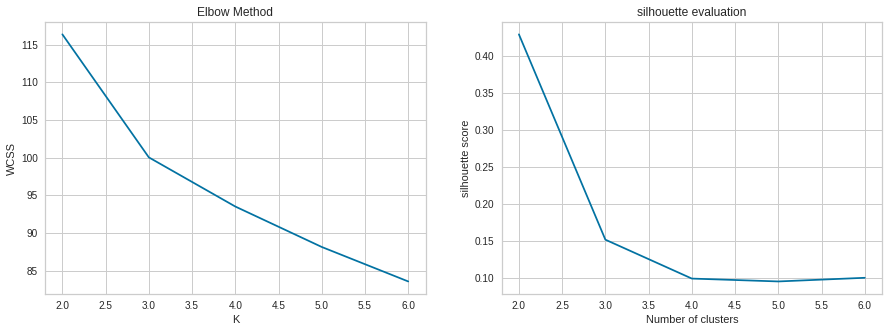

Kmeans
Best K value = 2, with silhouette_score = 0.42875853180885315
the cohen_kappa_score =  0.04874999999999996
the homogeneity_score =  0.03738763224308582
the completeness_score =  0.23969082165382008
the v_measure_score =  0.06468545039139305


In [ ]:
models_evaluation_dictionary["Kmeans_Doc2Vec"] = Kmeans_model(list(df['Doc2Vec']))

# EM

In [ ]:


def EM(X, n_components = 7):
  K =range(2, n_components)
  BIC = []
  AIC = []
  silhouette = []
  max_silhouette =-np.Infinity
  best_k = 0
  for k in K:

    model = GaussianMixture(k , covariance_type='full', random_state=0)
    model.fit(X)
    BIC.append(model.bic(X))
    AIC.append(model.aic(X))
    cluster_labels =model.predict(X)
    s_score = silhouette_score(X, cluster_labels)
    silhouette.append(s_score)
    if max_silhouette < s_score:
      max_silhouette = s_score 
      best_k = k


  champ_model = GaussianMixture(best_k , covariance_type='full', random_state=0)
  predicted_labels = champ_model.fit_predict(X)
  centers = champ_model.means_

#   my_scater_plot(X,"After clustering",centers=centers, labels=predicted_labels)
  plt.plot(K, BIC, label='BIC')
  plt.plot(K, AIC, label='AIC')
  plt.legend(loc='best')
  plt.xlabel('Number of clusters')
  plt.title('Elbow Method')
  plt.show()

  plt.plot(K, silhouette, label='silhouette')
  plt.title('silhouette evaluation')
  plt.xlabel('Number of clusters')
  plt.ylabel('silhouette score')
  plt.show()
  true_authers=df['Authors_Names']
  print("EM")
  
  conf_m = confusion_matrix(true_authers, predicted_labels)
  conf_argmax = conf_m.argmax(axis=0)
  pred = np.array([conf_argmax[i] for i in predicted_labels])

  cohen_kappa_scores =cohen_kappa_score(pred,true_authers)
  homogeneity=  homogeneity_score(true_authers, pred)
  completeness=  completeness_score(true_authers, pred)
  VM=v_measure_score(pred, true_authers)
  
  

  print(f'Best K value = {best_k}, with silhouette_score = {max_silhouette}')
  print("the cohen_kappa_score = ",cohen_kappa_scores)
  print("the homogeneity_score = ",homogeneity)
  print("the completeness_score = ",completeness)
  print("the v_measure_score = ",VM)
  return best_k, max_silhouette,cohen_kappa_scores,homogeneity,completeness,VM

In [ ]:
print(np.array(list(df['BOW'])).shape)
np.array(list(df['TF-IDF'])).shape

(1000, 12315)


(1000, 12315)

In [ ]:
# np.array(list(df['BOW'])).shape
pca_bow_1000 = PCA_function(list(df['BOW']),n_components=1000)
pca_rfidf_1000 = PCA_function(list(df['TF-IDF']),n_components=1000)

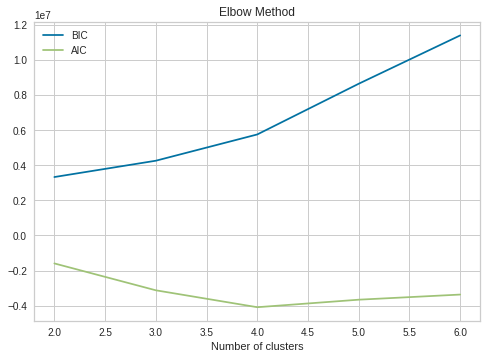

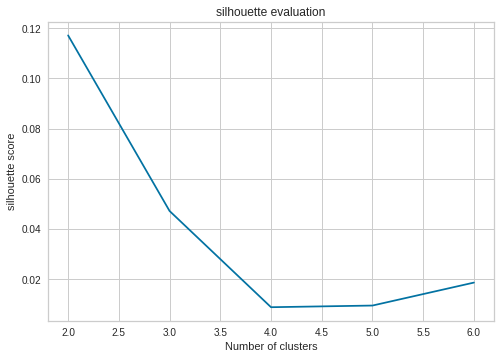

EM
Best K value = 2, with silhouette_score = 0.11712436637134505
the cohen_kappa_score =  0.20999999999999996
the homogeneity_score =  0.18488224529471656
the completeness_score =  0.5804522430497108
the v_measure_score =  0.2804402927497223


In [ ]:
models_evaluation_dictionary["EM_BOW"] = EM(pca_bow_1000)

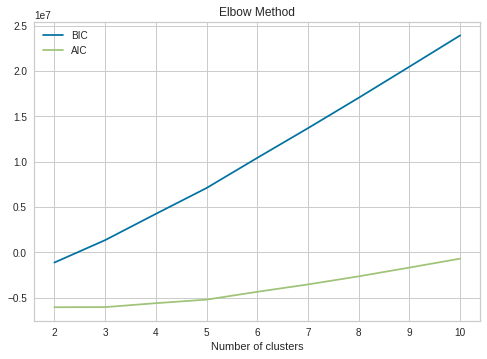

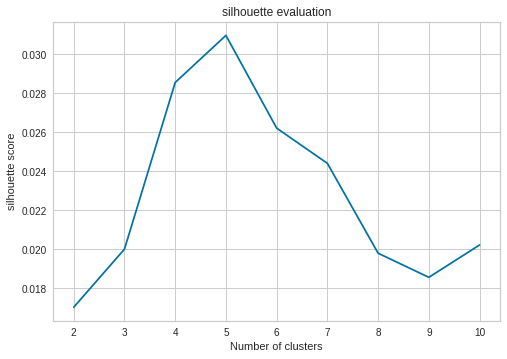

EM
Best K value = 5, with silhouette_score = 0.030972286377508047
the cohen_kappa_score =  0.9925
the homogeneity_score =  0.9831441396800142
the completeness_score =  0.9832541236056475
the v_measure_score =  0.983199128567039


In [ ]:
models_evaluation_dictionary["EM_TF-IDF"] =EM(pca_rfidf_1000,n_components=11)

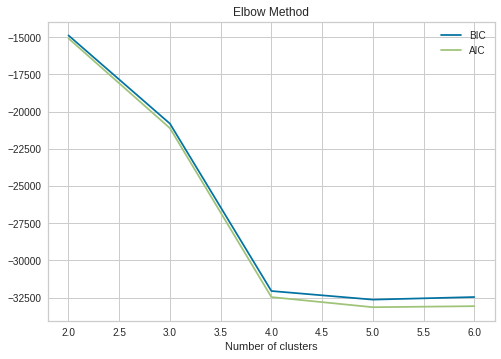

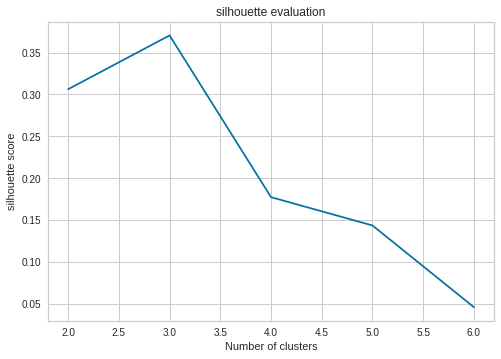

EM
Best K value = 3, with silhouette_score = 0.3704785722583183
the cohen_kappa_score =  0.44875
the homogeneity_score =  0.42720734780316205
the completeness_score =  0.6732911361038326
the v_measure_score =  0.5227356961604042


In [ ]:
models_evaluation_dictionary["EM_LDA"] =EM(np.array(list(df['LDA'])))

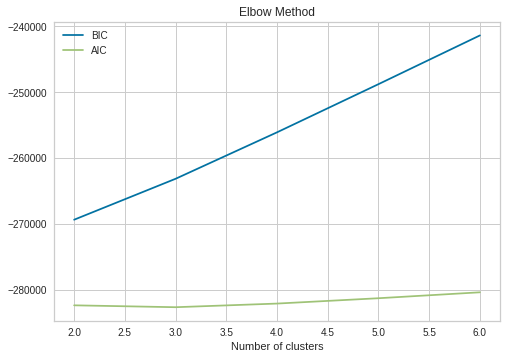

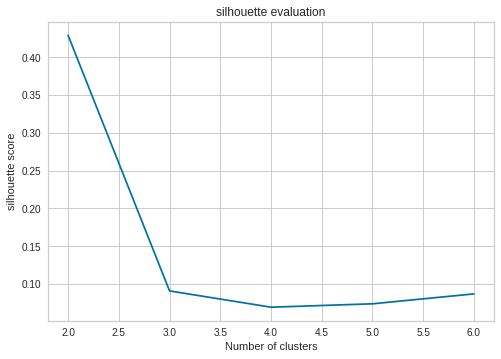

EM
Best K value = 2, with silhouette_score = 0.42875853180885315
the cohen_kappa_score =  0.04874999999999996
the homogeneity_score =  0.03738763224308582
the completeness_score =  0.23969082165382008
the v_measure_score =  0.06468545039139305


In [ ]:
models_evaluation_dictionary["EM_Doc2Vec"] =EM(np.array(list(df['Doc2Vec'])))


#  Hierarchica

In [ ]:
import scipy.cluster.hierarchy as shc
def Hierarchical(X, n_components = 7):
  points=X
  #dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))
  ####
  K =range(2, n_components)
  silhouette = []
  max_silhouette =-np.Infinity
  best_k = 0
  for k in K:

    model = AgglomerativeClustering(n_clusters=k, affinity = 'euclidean', linkage = 'ward')
    model.fit(X)
    cluster_labels =model.fit_predict(X)
    s_score = silhouette_score(X, cluster_labels)
    silhouette.append(s_score)
    if max_silhouette < s_score:
      max_silhouette = s_score 
      best_k = k


  plt.figure(figsize=(10, 7))
  dend = shc.dendrogram(shc.linkage(X, method='ward'))
  plt.show()
  champ_model =  AgglomerativeClustering(best_k, affinity = 'euclidean', linkage = 'ward')
  predicted_labels = champ_model.fit_predict(X)
  #centers = champ_model.means_
  
  plt.plot(K, silhouette, label='silhouette')
  plt.title('silhouette evaluation')
  plt.xlabel('Number of clusters')
  plt.ylabel('silhouette score')
  plt.show()


  #####
  true_authers=df['Authors_Names']
  print("Hierarchical")
  
  conf_m = confusion_matrix(true_authers, predicted_labels)
  conf_argmax = conf_m.argmax(axis=0)
  pred = np.array([conf_argmax[i] for i in predicted_labels])

  cohen_kappa_scores =cohen_kappa_score(pred,true_authers)
  homogeneity=  homogeneity_score(true_authers, pred)
  completeness=  completeness_score(true_authers, pred)
  VM=v_measure_score(pred, true_authers)
  

  print(f'Best K value = {best_k}, with silhouette_score = {max_silhouette}')
  print("the cohen_kappa_score = ",cohen_kappa_scores)
  print("the homogeneity_score = ",homogeneity)
  print("the completeness_score = ",completeness)
  print("the v_measure_score = ",VM)
  return best_k, max_silhouette,cohen_kappa_scores,homogeneity,completeness,VM

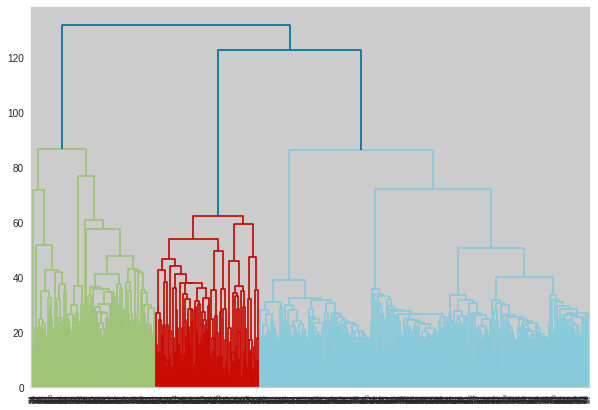

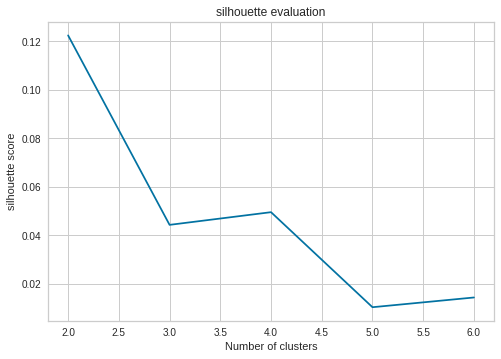

Hierarchical
Best K value = 2, with silhouette_score = 0.12241699817817502
the cohen_kappa_score =  0.24624999999999997
the homogeneity_score =  0.26110681793604706
the completeness_score =  0.7918823868389847
the v_measure_score =  0.3927217663191602


In [ ]:
models_evaluation_dictionary["Hierarchical_BOW"] = Hierarchical(list(df["BOW"]))

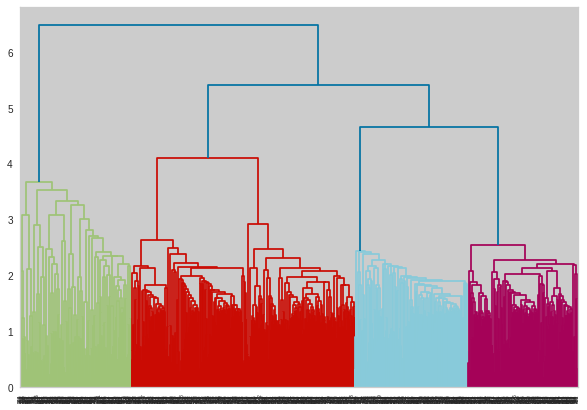

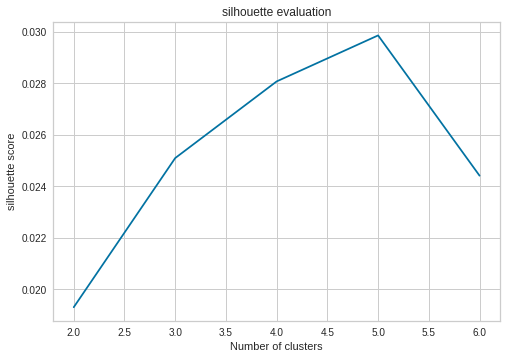

Hierarchical
Best K value = 5, with silhouette_score = 0.029861787786320006
the cohen_kappa_score =  0.96125
the homogeneity_score =  0.9122456739926335
the completeness_score =  0.9124101078803675
the v_measure_score =  0.9123278835272939


In [ ]:
models_evaluation_dictionary["Hierarchical_TF-IDF"] = Hierarchical(list(df["TF-IDF"]))

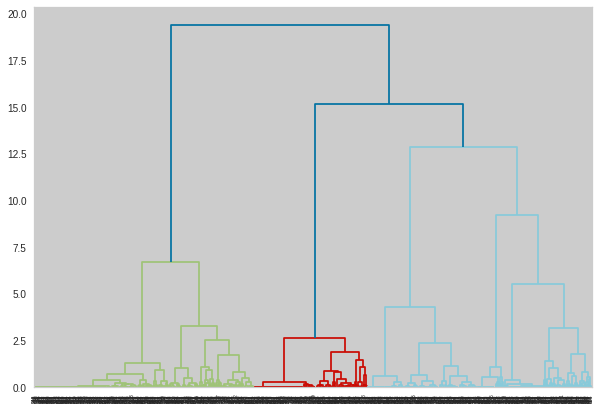

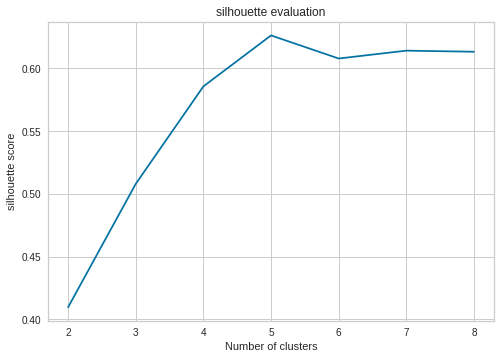

Hierarchical
Best K value = 5, with silhouette_score = 0.6263472814784912
the cohen_kappa_score =  0.72125
the homogeneity_score =  0.7247883591421345
the completeness_score =  0.8730265102675285
the v_measure_score =  0.7920309968052411


In [ ]:
models_evaluation_dictionary["Hierarchical_LDA"] = Hierarchical(list(df["LDA"]),n_components = 9)

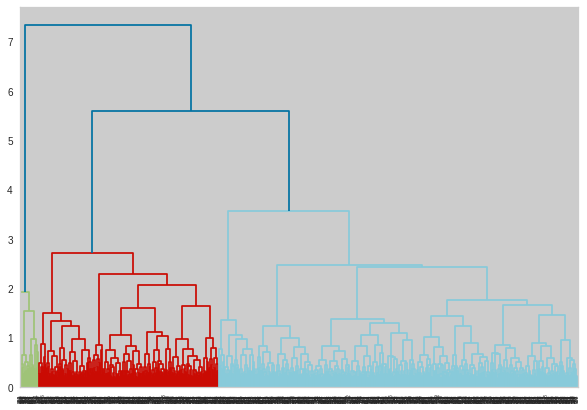

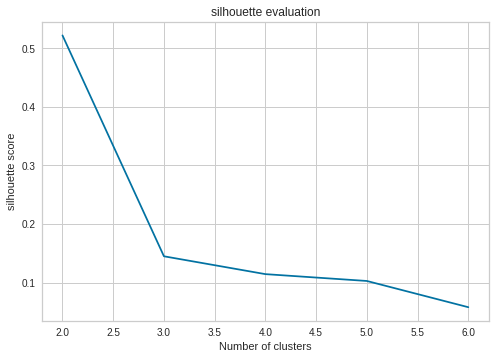

Hierarchical
Best K value = 2, with silhouette_score = 0.5220621228218079
the cohen_kappa_score =  0.03125
the homogeneity_score =  0.02059357621209041
the completeness_score =  0.22336882608432437
the v_measure_score =  0.03771042504970695


In [ ]:
models_evaluation_dictionary["Hierarchical_Doc2Vec"] = Hierarchical(list(df["Doc2Vec"]))

In [ ]:
%store models_evaluation_dictionary

Stored 'models_evaluation_dictionary' (dict)


# Model Selection

In [ ]:
# %store -r models_evaluation_dictionary
keys = models_evaluation_dictionary.keys()
keys = list(keys)

In [ ]:
models_evaluation_dictionary[keys[0]]

(2,
 0.42875853,
 0.04874999999999996,
 0.03738763224308582,
 0.23969082165382008,
 0.06468545039139305)

In [ ]:
!pip install --upgrade matplotlib
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


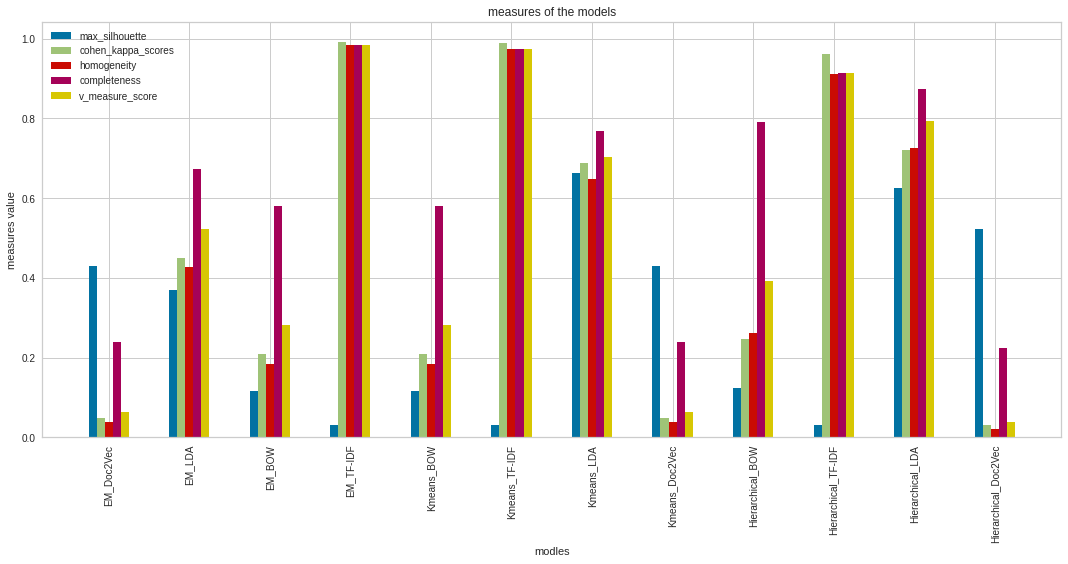

In [ ]:
import matplotlib.pyplot as plt
x_axes_labels = keys

x = np.arange(len(x_axes_labels))  # the label locations
width = 0.1  # the width of the bars
max_silhouette =[]
cohen_kappa_scores = []
homogeneity = []
completeness = []
v_measure_score = []
num_clusters = []
for key in keys:  
  num_clusters.append(models_evaluation_dictionary[key][0])
  max_silhouette.append(models_evaluation_dictionary[key][1])
  cohen_kappa_scores.append(models_evaluation_dictionary[key][2])
  homogeneity.append(models_evaluation_dictionary[key][3])
  completeness.append(models_evaluation_dictionary[key][4])
  v_measure_score.append(models_evaluation_dictionary[key][5])
fig, ax = plt.subplots(figsize=(15,8))
  # best_k, max_silhouette,cohen_kappa_scores,homogeneity,completeness,VM
rects1 = ax.bar(x - 2*width, max_silhouette, width, label='max_silhouette')
rects2 = ax.bar(x - width, cohen_kappa_scores, width, label='cohen_kappa_scores')
rects3 = ax.bar(x, homogeneity, width, label='homogeneity')
rects4 = ax.bar(x + width,completeness, width, label='completeness')
rects5 = ax.bar(x + 2*width, v_measure_score, width, label='v_measure_score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('measures value')
ax.set_xlabel('modles')
ax.set_title('measures of the models')
ax.set_xticks(x, x_axes_labels , rotation='vertical')
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

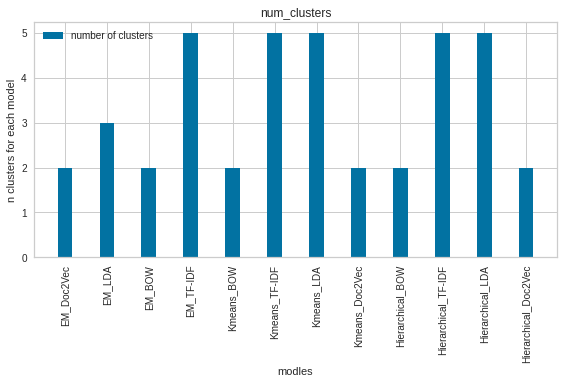

In [ ]:
# import matplotlib.pyplot as plt
x_axes_labels = keys

x = np.arange(len(x_axes_labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()

rects5 = ax.bar(x, num_clusters, width, label='number of clusters')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('n clusters for each model')
ax.set_xlabel('modles')
ax.set_title('num_clusters')
ax.set_xticks(x, x_axes_labels , rotation='vertical')
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.show()

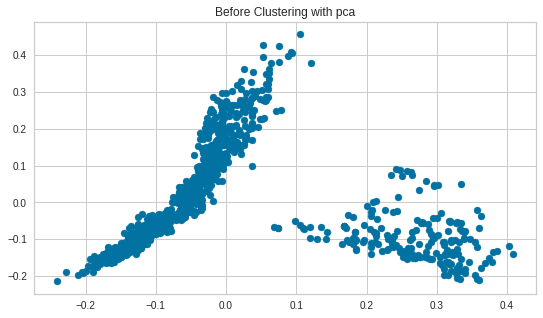

In [ ]:
pca_tfidf = PCA_function(list(df["TF-IDF"]))
my_scater_plot(pca_tfidf,"Before Clustering with pca" )


In [ ]:
# %store -r df
X= PCA_function(list(df['TF-IDF']),n_components=1000)
champ_model = GaussianMixture(5 , covariance_type='full', random_state=0)
predicted_labels = champ_model.fit_predict(X)
centers = champ_model.means_

true_authers=df['Authors_Names']
print("EM")

conf_m = confusion_matrix(true_authers, predicted_labels)
conf_argmax = conf_m.argmax(axis=0)
pred = np.array([conf_argmax[i] for i in predicted_labels])

cohen_kappa_scores =cohen_kappa_score(pred,true_authers)
homogeneity=  homogeneity_score(true_authers, pred)
completeness=  completeness_score(true_authers, pred)
VM=v_measure_score(pred, true_authers)
s_score = silhouette_score(X, predicted_labels)

print(f'Best K value = {5}, with silhouette_score = {s_score}')
print("the cohen_kappa_score = ",cohen_kappa_scores)
print("the homogeneity_score = ",homogeneity)
print("the completeness_score = ",completeness)
print("the v_measure_score = ",VM)


EM
Best K value = 5, with silhouette_score = 0.03055157144017834
the cohen_kappa_score =  0.995
the homogeneity_score =  0.9852079361045991
the completeness_score =  0.9852171031621273
the v_measure_score =  0.985212519612039


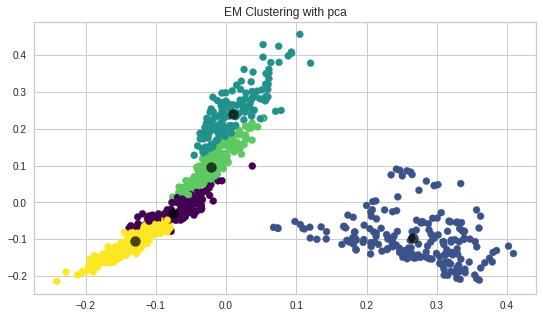

In [ ]:
model_pca = GaussianMixture(5 , covariance_type='full', random_state=0)


em_labels = model_pca.fit_predict(pca_tfidf)
my_scater_plot(pca_tfidf,"EM Clustering with pca" ,centers = model_pca.means_, labels =em_labels)

# Error Analysis

In [ ]:
true_labels = df['Authors_Names']
conf_m = confusion_matrix(true_labels, predicted_labels)
conf_m_argmax = conf_m.argmax(axis=0)
pred = np.array([conf_m_argmax[i] for i in predicted_labels])


In [ ]:
false_prediction = pred != true_labels
x_test_wrong = df["Words"][false_prediction]
len(x_test_wrong)

4

In [ ]:
error_score = len(x_test_wrong)/len(true_labels)
print("error_score = ", error_score)

error_score =  0.004


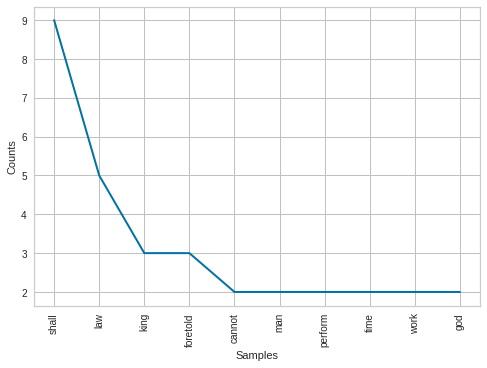

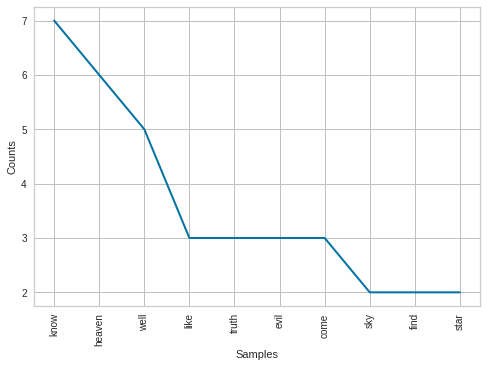

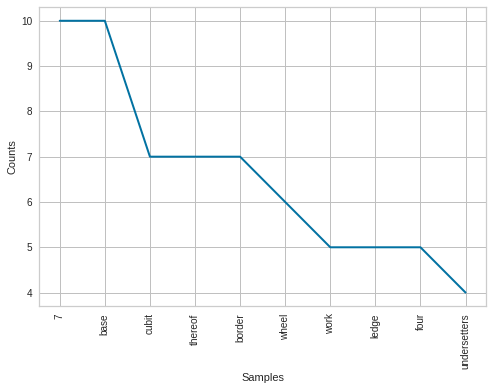

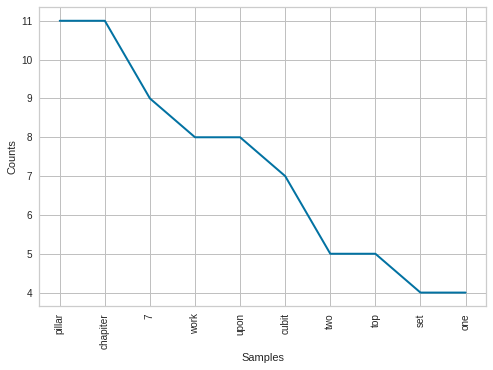

In [ ]:
for false_index in x_test_wrong:
  freq = nltk.FreqDist(false_index)
  freq.plot(10, cumulative=False)